Trabalho Final - Introdução ao Aprendizado de Máquina

Gustavo Mariz, Andrew Faria e Matheus Percine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#Importando a Database
df = pd.read_csv("/content/baseprocessada_v2.csv",sep=",", encoding='cp1252')

#Printando para avaliar a importação
df.head()

,bathrooms,bedrooms,has_photo,price,square_feet,cityname,state,latitude,longitude,time,...,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors,dogs,cats
0,1.0,1.0,1,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,1577360355,...,0,0,0,0,0,0,0,0,0,1
1,1.5,3.0,1,1250.0,1500,Newport News,VA,37.0867,-76.4941,1577360340,...,0,0,0,0,0,0,0,0,1,1
2,2.0,3.0,1,1395.0,1650,Raleigh,NC,35.8230,-78.6438,1577360332,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2.0,1,1600.0,820,Vacaville,CA,38.3622,-121.9712,1577360330,...,0,0,0,0,0,0,0,0,1,1
4,1.0,1.0,1,975.0,624,Albuquerque,NM,35.1038,-106.6110,1577360308,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder em cada coluna categórica
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])


In [ ]:
#Definindo as matrizes para os modelos
x = df.drop(columns=['price'])
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Iniciar os modelos de regressão
models = {
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'LGBM': LGBMRegressor(random_state=42),
    'XGB': XGBRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Bagging': BaggingRegressor(random_state=42)
}

# Treinar e testar os modelos
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    print(f"{name} R^2 score: {score:.4f}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


SVR R^2 score: -0.0381
Linear Regression R^2 score: 0.2548
Decision Tree R^2 score: 0.7483
Random Forest R^2 score: 0.8670
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1404
[LightGBM] [Info] Number of data points in the train set: 78446, number of used features: 37
[LightGBM] [Info] Start training from score 1476.944675
LGBM R^2 score: 0.7856
XGB R^2 score: 0.8281
AdaBoost R^2 score: 0.0771
Bagging R^2 score: 0.8516


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Criar a função objetivo do Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }


    model = RandomForestRegressor(**param, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    return score

# Otimizar com o Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Obter o melhor resultado
best_trial = study.best_trial
print(f"Best trial R^2 score: {best_trial.value:.4f}")
print("Best hyperparameters: ", best_trial.params)

# Treinar o modelo com os melhores hiperparâmetros encontrados
best_params = best_trial.params
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
final_score = r2_score(y_test, y_pred)
print(f"Final R^2 score: {final_score:.4f}")

[I 2024-11-04 18:07:08,814] A new study created in memory with name: no-name-12d11be7-91c9-49ff-9327-154a4f4008dd
[I 2024-11-04 18:08:48,940] Trial 0 finished with value: 0.662228755525773 and parameters: {'n_estimators': 925, 'max_depth': 11, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.662228755525773.
[I 2024-11-04 18:09:11,013] Trial 1 finished with value: 0.5484842424977661 and parameters: {'n_estimators': 297, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.662228755525773.
[I 2024-11-04 18:09:50,687] Trial 2 finished with value: 0.6542119730937133 and parameters: {'n_estimators': 376, 'max_depth': 11, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.662228755525773.
[I 2024-11-04 18:10:33,878] Trial 3 finished with value: 0.7935102456329887

Best trial R^2 score: 0.8574
Best hyperparameters:  {'n_estimators': 932, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}
Final R^2 score: 0.8574


Mean Squared Error: 58859.205918914085
R-squared: 0.8574246797109899


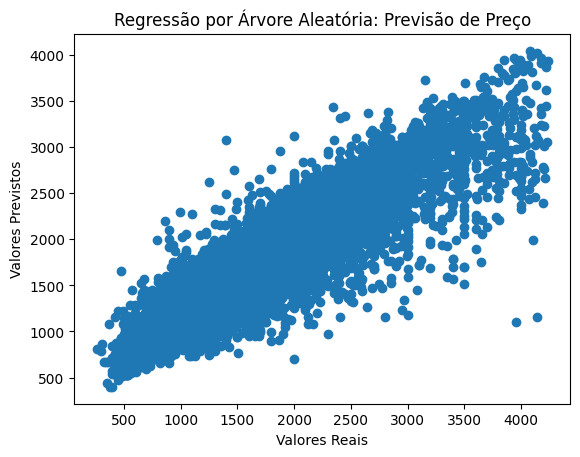

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões com os dados de teste
y_pred = best_model.predict(x_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotar os resultados (opcional)
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Regressão por Árvore Aleatória: Previsão de Preço")
plt.show()

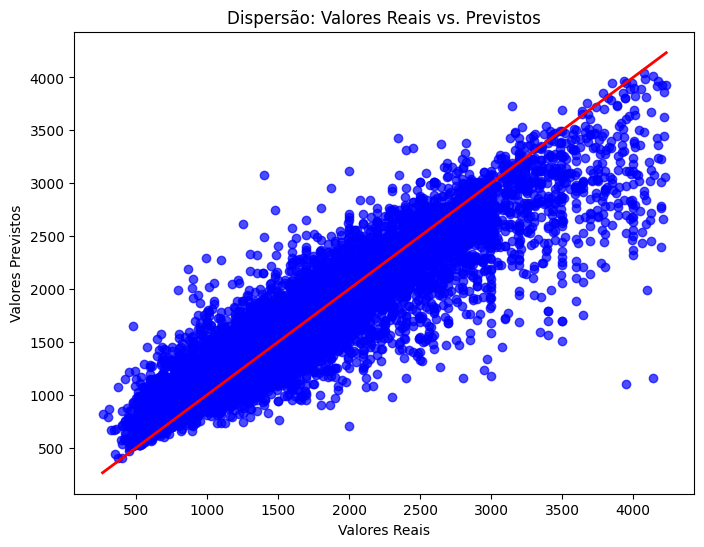

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

model = RandomForestRegressor(n_estimators = 932, max_depth = 30, min_samples_split = 4, min_samples_leaf = 1, max_features = 'sqrt', bootstrap = True, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
score = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Dispersão: Valores Reais vs. Previstos")
plt.show()
plt.savefig("real_vs_predicted.png", format='png', dpi=300)


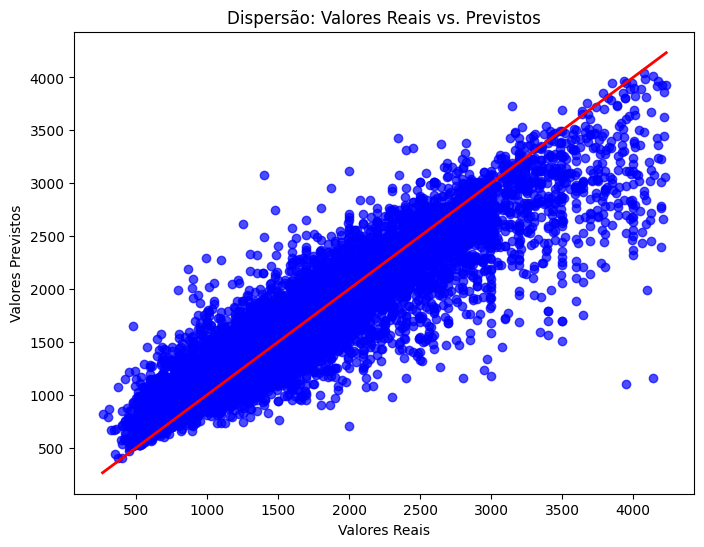

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Dispersão: Valores Reais vs. Previstos")
plt.show()
plt.savefig("real_vs_predicted.png", format='png', dpi=300)

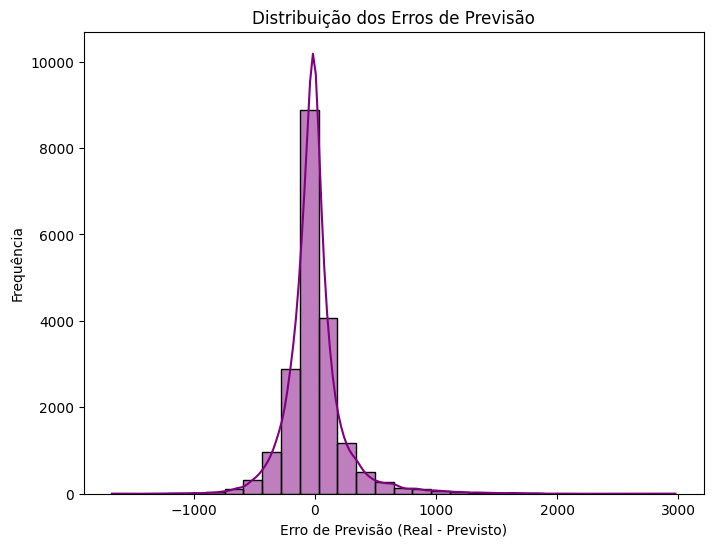

<Figure size 640x480 with 0 Axes>

In [ ]:
erros = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(erros, kde=True, color='purple', bins=30)
plt.xlabel("Erro de Previsão (Real - Previsto)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Erros de Previsão")
plt.show()
plt.savefig("error_dist.png", format='png', dpi=300)

<ipython-input-21-5d8c90c2f4eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


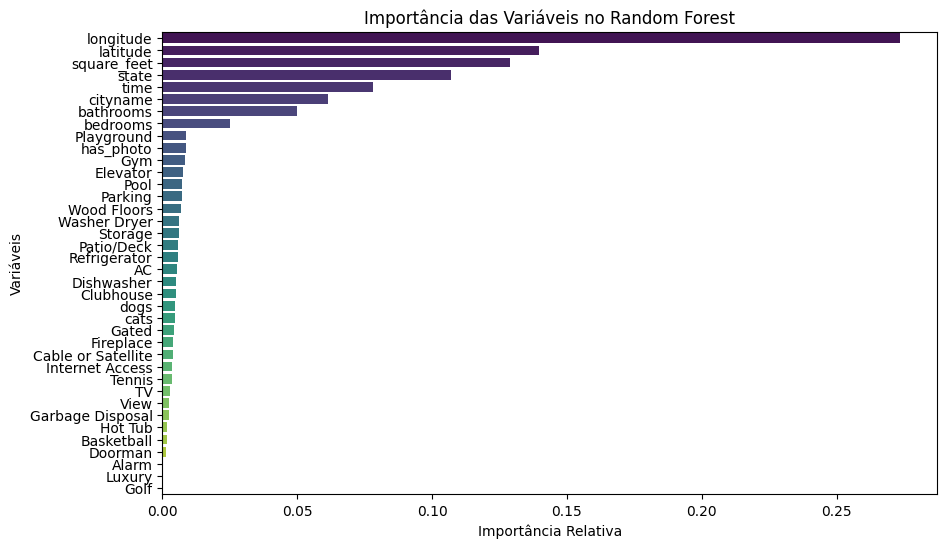

<Figure size 640x480 with 0 Axes>

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.xlabel("Importância Relativa")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis no Random Forest")
plt.show()
plt.savefig("importance.png", format='png', dpi=300)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    modelfold = RandomForestRegressor(n_estimators=932, max_depth=30, min_samples_split=4,
                                  min_samples_leaf=1, max_features='sqrt', bootstrap=True, random_state=42)
    modelfold.fit(x_train, y_train)
    y_pred = modelfold.predict(x_test)
    score = r2_score(y_test, y_pred)
    scores.append(score)

print(f"R^2 Scores: {scores}")
print(f"Mean R^2: {np.mean(scores):.4f}")


R^2 Scores: [0.857503702172949, 0.8612308723065716, 0.8622164698531373, 0.8672420929679419, 0.8627838355047702]
Mean R^2: 0.8622
